### 1. Install required packages

In [69]:
# devtools::install_github('reptalex/phylofactor')
# BiocManager::install("ggtree")
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'DESeq2'

also installing the dependencies ‘XML’, ‘annotate’, ‘genefilter’, ‘geneplotter’


Warning message in .inet_warning(msg):
“installation of package ‘XML’ had non-zero exit status”
Warning message in .inet_warning(msg):
“installation of package ‘annotate’ had non-zero exit status”
Warning message in .inet_warning(msg):
“installation of package ‘genefilter’ had non-zero exit status”
Warning message in .inet_warning(msg):
“installation of package ‘geneplotter’ had non-zero exit status”
Warning message in .inet_warning(msg):
“installation of package ‘DESeq2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'stringi'



### 2. Load required libraries

In [65]:
library(phylofactor)
library(ggtree)
library(phyloseq)
library(ggplot2)
library(DESeq2)

ERROR: Error in library(DESeq2): there is no package called ‘DESeq2’


#### 2a. Load R objects from diversity analyses

In [6]:
load("../02-diversity_analyses/.RData")

### 3. Phylofactor analysis

#### 3a. First by study group

Warning message in PhyloFactor(asv_tab_diff, tree, x, nfactors = 3):
“Data has zeros and will receive default modification of zeros. Zeros will be replaced column wise with delta*min(x[x>0]), default delta=0.65”


pdf 
  2

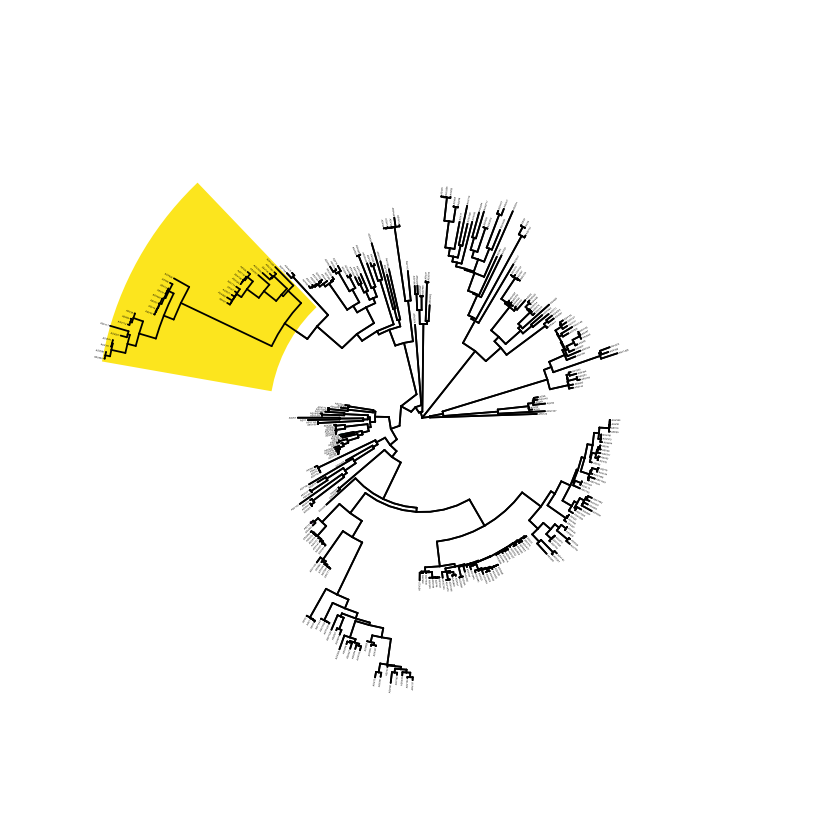

In [10]:
system("mkdir img")
asv_tab_diff <- as.matrix(t(read.table("../01-read_processing/sequence_table.filt.txt", header=T, sep="\t")))

# only DOMHaIN samples
filt.list <- grep(colnames(asv_tab_diff), pattern="DM", value=T)
asv_tab_diff <- asv_tab_diff[,colnames(asv_tab_diff) %in% filt.list]
filtmap <- metadata[rownames(metadata) %in% filt.list,]
filtmap <- filtmap[match(filt.list, rownames(filtmap)),]

x <- as.factor(filtmap$study_group) # variable of interest
tree <- phy_tree(philr.dat)
tax <- tax_table(philr.dat)
common.asvs <- which(rowSums(asv_tab_diff>0)>50)
asv_tab_diff <- asv_tab_diff[common.asvs,]
tree <- ape::drop.tip(tree, setdiff(tree$tip.label, rownames(asv_tab_diff)))
pf <- PhyloFactor(asv_tab_diff, tree, x, nfactors=3)
pf$Data <- pf$Data[pf$tree$tip.label,]
gtree <- pf.tree(pf)
pdf("img/phylofactor_tree.study_group.pdf")
gtree$ggplot + geom_tiplab(size=0.5)
dev.off()
gtree$ggplot + geom_tiplab(size=0.5)

Factor 1 boxplots

pdf 
  2

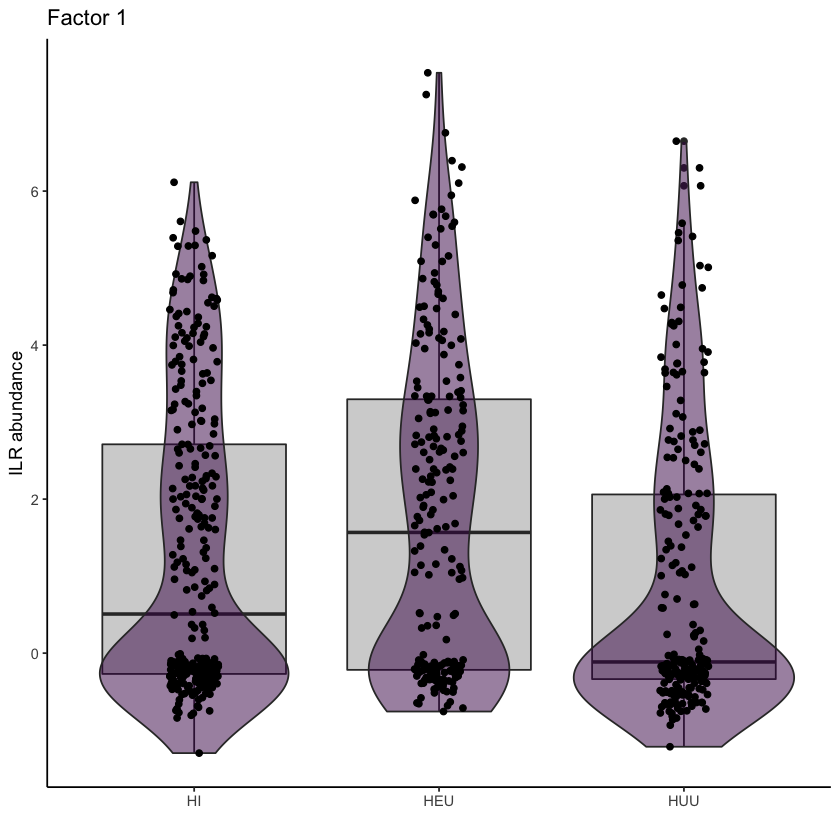

In [13]:
levs <- c("HI", "HEU", "HUU")
y <- t(pf$basis[,1]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[1], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1')
bplt
pdf("img/factor1_boxp.study_group.pdf")
bplt
dev.off()

Significance

In [14]:
# significance (this is ugly code but it gets the job done)
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

[1] "HEU vs HI: p=0.015665033401107 W=37007"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HEU vs HI: p=0.015665033401107 W=37007"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HEU vs HUU: p=1.39117529798392e-06 W=32506"
[1] "HUU vs HI: p=0.00423391930861931 W=28890"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HI vs HUU: p=0.00423391930861931 W=38730"
[1] "HUU vs HI: p=0.00423391930861931 W=28890"


Factor 2

pdf 
  2

[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HUU vs HI: p=0.00107078984453791 W=28183"
[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HI vs HUU: p=0.00107078984453791 W=39437"
[1] "HUU vs HI: p=0.00107078984453791 W=28183"


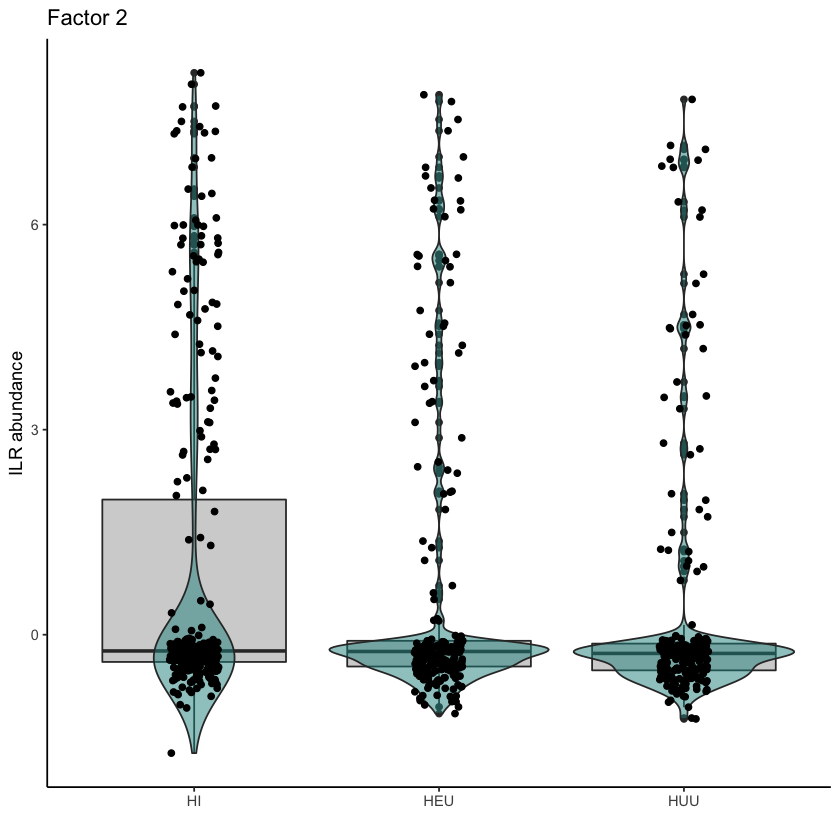

In [15]:
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[2], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2') 
bplt
pdf("img/factor2_boxp.study_group.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

Factor 3

pdf 
  2

[1] "HEU vs HI: p=0.000724649908411618 W=38633"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"
[1] "HEU vs HI: p=0.000724649908411618 W=38633"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"
[1] "HEU vs HUU: p=0.0246881996173597 W=28900"


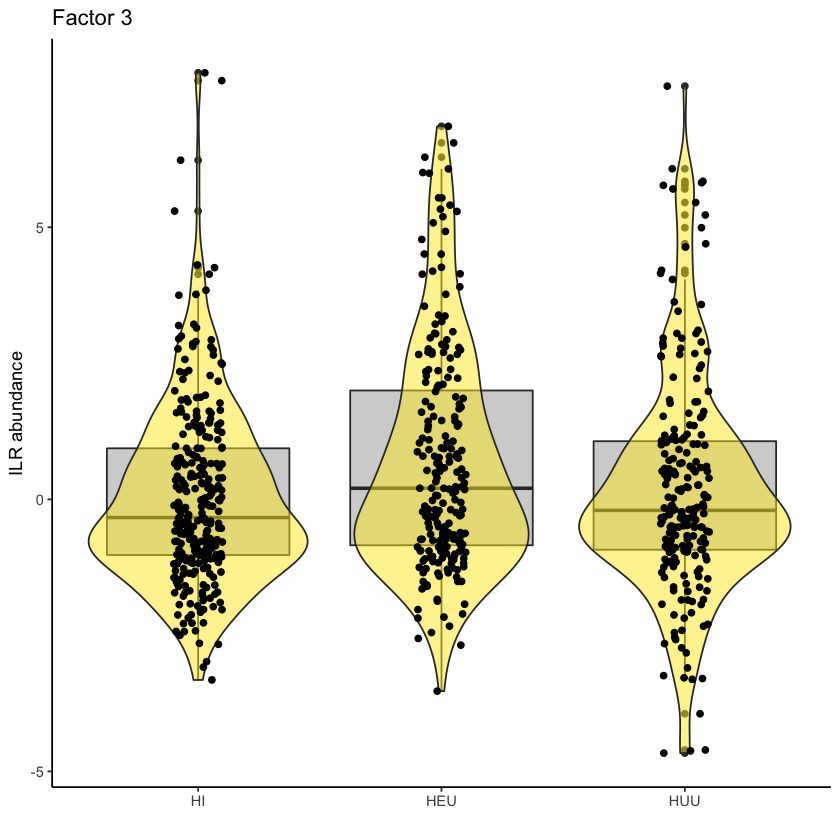

In [16]:
y <- t(pf$basis[,3]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[3], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3')
bplt 
pdf("img/factor3_boxp.study_group.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

#### 3b. By aliquot type

Warning message in PhyloFactor(asv_tab_diff, tree, x, nfactors = 3):
“Data has zeros and will receive default modification of zeros. Zeros will be replaced column wise with delta*min(x[x>0]), default delta=0.65”


pdf 
  2

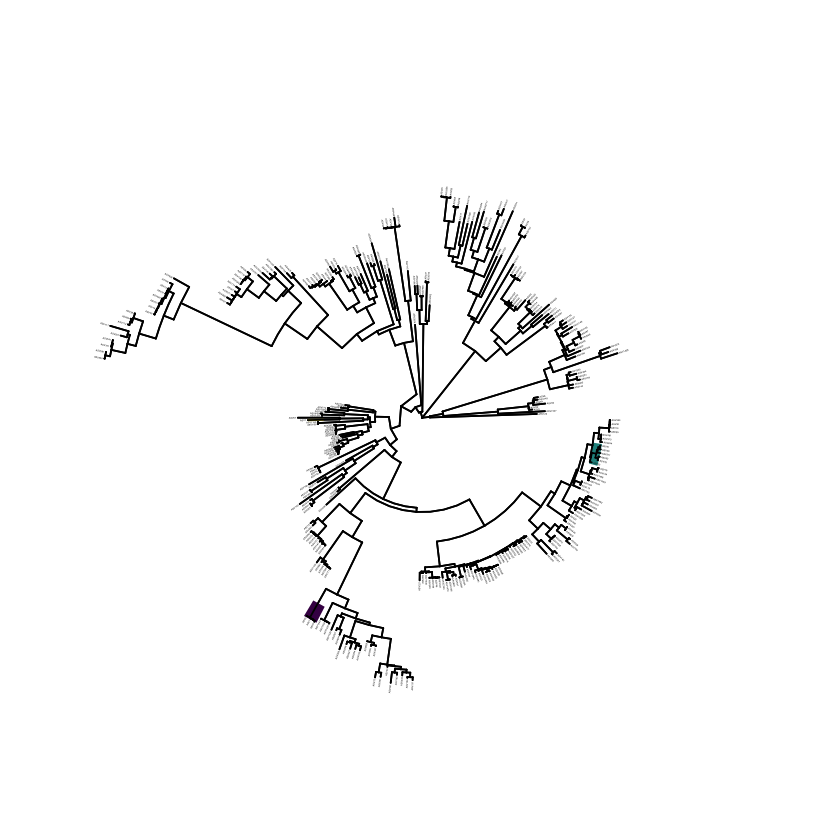

In [17]:
x <- as.factor(filtmap$aliquot_type) # variable of interest
tree <- phy_tree(philr.dat)
tax <- tax_table(philr.dat)
common.asvs <- which(rowSums(asv_tab_diff>0)>50)
asv_tab_diff <- asv_tab_diff[common.asvs,]
tree <- ape::drop.tip(tree, setdiff(tree$tip.label, rownames(asv_tab_diff)))
pf <- PhyloFactor(asv_tab_diff, tree, x, nfactors=3)
pf$Data <- pf$Data[pf$tree$tip.label,]
gtree <- pf.tree(pf)
pdf("img/phylofactor_tree.aliquot_type.pdf")
gtree$ggplot + geom_tiplab(size=0.5)
dev.off()
gtree$ggplot + geom_tiplab(size=0.5)

Factor 1

pdf 
  2

[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "C

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CF-PF: p=2.37332726228726e-15 W=32020"
[1] "CA-PD vs CA-PE: p=0.000307310236269425 W=3534"
[1] "CA-PD vs CA-PF: p=3.64288137322701e-09 W=8105"
[1] "CA-PD vs CAE-PE: p=0.0148350663090476 W=1250"
[1] "CA-PD vs CAE-PF: p=2.47453347443393e-07 W=4003"
[1] "C

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[ro

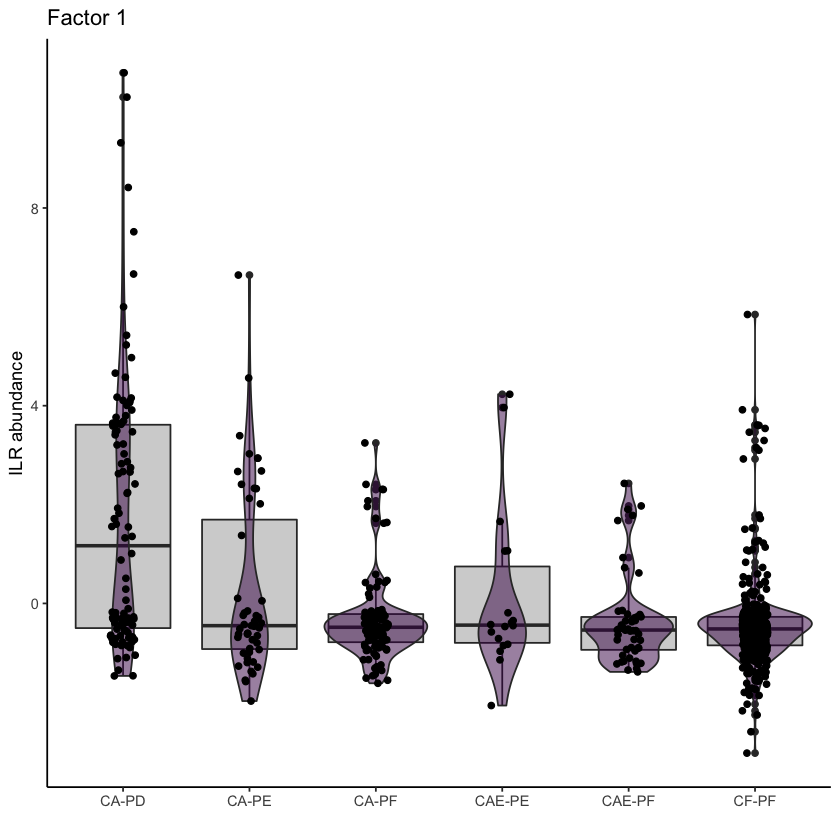

In [19]:
levs <- c("CA-PD", "CA-PE", "CA-PF", "CAE-PE", "CAE-PF", "CF-PF")
y <- t(pf$basis[,1]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[1], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1')
bplt
pdf("img/factor1_boxp.aliquot_type.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

Factor 2

pdf 
  2

[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD 

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CF-PF vs CA-PE: p=0.029872

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


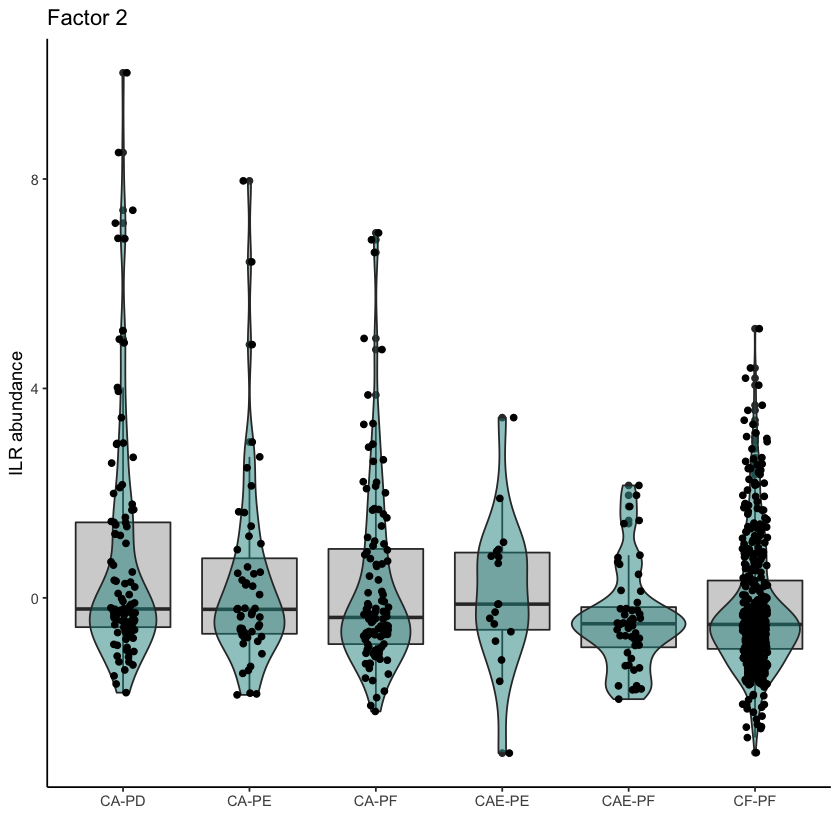

In [20]:
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[2], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2')
bplt
pdf("img/factor2_boxp.aliquot_type.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

Factor 3

pdf 
  2

[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD 

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CAE-PF: p=0.000418309612968328 W=3576"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27343"
[1] "CA-PD vs CF-PF: p=7.63751211431779e-06 W=27

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CAE-PF: p=0.0356534623924598 W=1645"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CA-PE vs CF-PF: p=0.0298720922416154 W=12614"
[1] "CF-PF vs CA-PE: p=0.029872

Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CA-PF vs CF-PF: p=0.0387122949218066 W=25423"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"


Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dat[dat$V1 == levels[row, col], ]$V2, dat[dat$V1 == :
“cannot compute exact p-value with ties”


[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CAE-PF vs CA-PE: p=0.0356534623924598 W=1007"
[1] "CF-PF vs CA-PE: p=0.0298720922416154 W=8653"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"
[1] "CF-PF vs CA-PF: p=0.0387122949218066 W=19613"


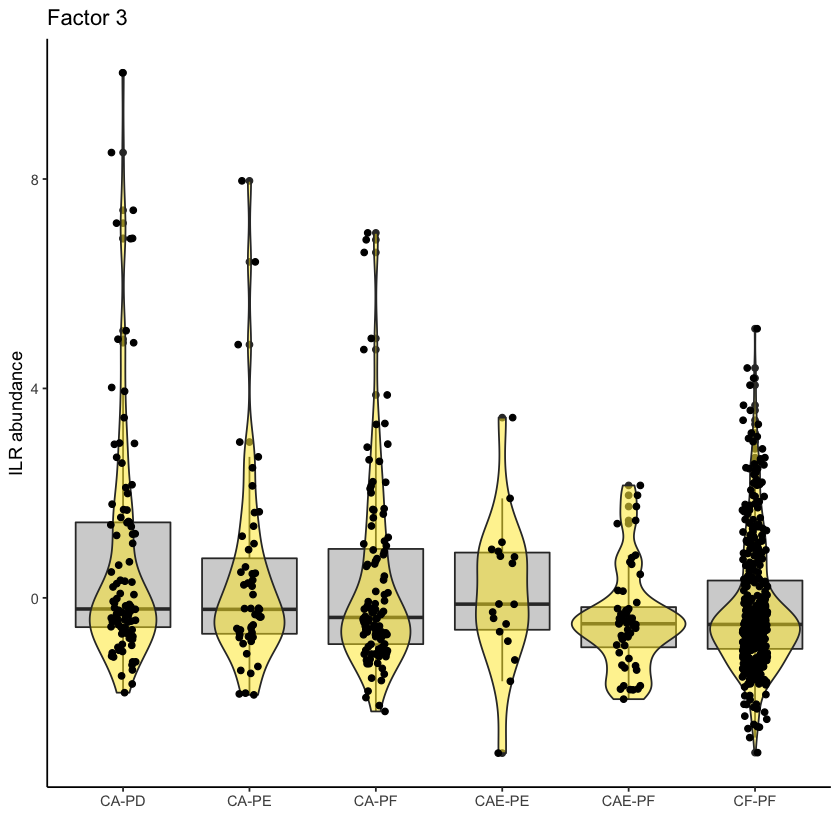

In [21]:
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
bplt <- ggplot(dat, aes(x=factor(V1, level=levs), y=V2)) + geom_boxplot(fill="light grey") + geom_violin(fill=gtree$legend$colors[3], alpha=0.5) + geom_jitter(position=position_jitter(width=0.1)) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3')
bplt
pdf("img/factor3_boxp.aliquot_type.pdf")
bplt
dev.off()

# significance
levels <- t(combn(levels(as.factor(dat$V1)), 2))
for(row in 1:nrow(levels)){
   for(col in 1:ncol(levels)){
      for(row1 in 1:nrow(levels)){
         for(col2 in 2:ncol(levels)){
            p <- wilcox.test(dat[dat$V1 == levels[row,col],]$V2, dat[dat$V1 == levels[row1,col2],]$V2)
               if(p$p.value <= 0.05){
                  print(paste0(levels[row,col], " vs ", levels[row1,col2], ": p=", p$p.value, " W=", p$statistic))
               }
         }
      }

   }
}

### 4. DeSeq2 differential abundance

#### 4a. Comparing HI CF-PF to HEU CF-PF